In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [3]:
import pytorch_optimizer as optim

In [4]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [5]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [6]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [7]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [8]:
len(y_train), len(y_test)

(50000, 10000)

In [9]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [10]:
X_train /= 255.
X_test /= 255.

In [11]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

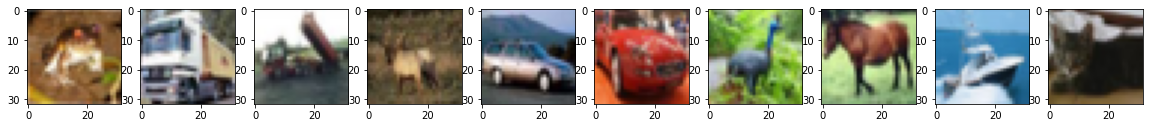

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [13]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [14]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [15]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [33]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    #optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
    #optimizer = optim.YogiPNM(net.parameters(), lr=0.001)
    #optimizer = optim.AdaBelief(net.parameters())
    #optimizer = optim.DiffGrad(net.parameters())
    #optimizer = optim.Yogi(net.parameters())
    
    batch_size = 200

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(20):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        


        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")
    del net
    return test_accuracy_history, test_loss_history



In [21]:
accuracies = {}
losses = {}

In [18]:
from torchvision.models import googlenet, GoogLeNet_Weights
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [22]:
accuracies['googlenet+PNMBelief'], losses['googlenet+PNMBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:18<00:00, 13.52it/s]


accuracy =  0.7851999998092651



epoch  1


100%|██████████| 250/250 [00:17<00:00, 14.07it/s]


accuracy =  0.7953999638557434



epoch  2


100%|██████████| 250/250 [00:16<00:00, 14.72it/s]


accuracy =  0.8093000054359436



epoch  3


100%|██████████| 250/250 [00:16<00:00, 14.86it/s]


accuracy =  0.7926999926567078



epoch  4


100%|██████████| 250/250 [00:17<00:00, 14.05it/s]


accuracy =  0.8086000084877014



epoch  5


100%|██████████| 250/250 [00:16<00:00, 14.73it/s]


accuracy =  0.8050999641418457



epoch  6


100%|██████████| 250/250 [00:17<00:00, 14.58it/s]


accuracy =  0.8179999589920044



epoch  7


100%|██████████| 250/250 [00:18<00:00, 13.61it/s]


accuracy =  0.8121999502182007



epoch  8


100%|██████████| 250/250 [00:17<00:00, 14.47it/s]


accuracy =  0.807699978351593



epoch  9


100%|██████████| 250/250 [00:17<00:00, 14.37it/s]


accuracy =  0.8216999769210815



epoch  10


100%|██████████| 250/250 [00:17<00:00, 14.22it/s]


accuracy =  0.8158999681472778



epoch  11


100%|██████████| 250/250 [00:17<00:00, 14.56it/s]


accuracy =  0.8190999627113342



epoch  12


100%|██████████| 250/250 [00:22<00:00, 11.31it/s]


accuracy =  0.816100001335144



epoch  13


100%|██████████| 250/250 [00:20<00:00, 12.36it/s]


accuracy =  0.8235999941825867



epoch  14


100%|██████████| 250/250 [00:20<00:00, 11.97it/s]


accuracy =  0.8176999688148499



epoch  15


100%|██████████| 250/250 [00:24<00:00, 10.12it/s]


accuracy =  0.8180999755859375



epoch  16


100%|██████████| 250/250 [00:17<00:00, 13.92it/s]


accuracy =  0.8235999941825867



epoch  17


100%|██████████| 250/250 [00:18<00:00, 13.18it/s]


accuracy =  0.8279999494552612



epoch  18


100%|██████████| 250/250 [00:17<00:00, 14.43it/s]


accuracy =  0.8209999799728394



epoch  19


100%|██████████| 250/250 [00:17<00:00, 14.40it/s]


accuracy =  0.8263999819755554





In [24]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+YogiPNM'], losses['googlenet+YogiPNM'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:18<00:00, 13.35it/s]


accuracy =  0.7287999987602234



epoch  1


100%|██████████| 250/250 [00:17<00:00, 14.68it/s]


accuracy =  0.7717999815940857



epoch  2


100%|██████████| 250/250 [00:18<00:00, 13.88it/s]


accuracy =  0.7797999978065491



epoch  3


100%|██████████| 250/250 [00:16<00:00, 14.78it/s]


accuracy =  0.7854999899864197



epoch  4


100%|██████████| 250/250 [00:16<00:00, 14.78it/s]


accuracy =  0.7865999937057495



epoch  5


100%|██████████| 250/250 [00:18<00:00, 13.87it/s]


accuracy =  0.795199990272522



epoch  6


100%|██████████| 250/250 [00:17<00:00, 14.68it/s]


accuracy =  0.7935999631881714



epoch  7


100%|██████████| 250/250 [00:16<00:00, 14.80it/s]


accuracy =  0.7958999872207642



epoch  8


100%|██████████| 250/250 [00:17<00:00, 14.05it/s]


accuracy =  0.8033999800682068



epoch  9


100%|██████████| 250/250 [00:16<00:00, 14.80it/s]


accuracy =  0.8000999689102173



epoch  10


100%|██████████| 250/250 [00:17<00:00, 14.06it/s]


accuracy =  0.7985000014305115



epoch  11


100%|██████████| 250/250 [00:17<00:00, 14.17it/s]


accuracy =  0.8033999800682068



epoch  12


100%|██████████| 250/250 [00:16<00:00, 14.82it/s]


accuracy =  0.8057000041007996



epoch  13


100%|██████████| 250/250 [00:17<00:00, 14.42it/s]


accuracy =  0.809499979019165



epoch  14


100%|██████████| 250/250 [00:17<00:00, 14.43it/s]


accuracy =  0.8068999648094177



epoch  15


100%|██████████| 250/250 [00:16<00:00, 14.73it/s]


accuracy =  0.8027999997138977



epoch  16


100%|██████████| 250/250 [00:17<00:00, 14.32it/s]


accuracy =  0.8116999864578247



epoch  17


100%|██████████| 250/250 [00:17<00:00, 14.44it/s]


accuracy =  0.8057000041007996



epoch  18


100%|██████████| 250/250 [00:16<00:00, 14.77it/s]


accuracy =  0.8051999807357788



epoch  19


100%|██████████| 250/250 [00:17<00:00, 14.29it/s]


accuracy =  0.8129000067710876





In [26]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+AdaBelief'], losses['googlenet+AdaBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:16<00:00, 15.34it/s]


accuracy =  0.6730999946594238



epoch  1


100%|██████████| 250/250 [00:15<00:00, 15.67it/s]


accuracy =  0.7448999881744385



epoch  2


100%|██████████| 250/250 [00:15<00:00, 15.87it/s]


accuracy =  0.7745999693870544



epoch  3


100%|██████████| 250/250 [00:16<00:00, 15.39it/s]


accuracy =  0.7823999524116516



epoch  4


100%|██████████| 250/250 [00:16<00:00, 15.41it/s]


accuracy =  0.7792999744415283



epoch  5


100%|██████████| 250/250 [00:15<00:00, 15.69it/s]


accuracy =  0.7893999814987183



epoch  6


100%|██████████| 250/250 [00:15<00:00, 15.74it/s]


accuracy =  0.7955999970436096



epoch  7


100%|██████████| 250/250 [00:16<00:00, 15.50it/s]


accuracy =  0.7963999509811401



epoch  8


100%|██████████| 250/250 [00:16<00:00, 15.39it/s]


accuracy =  0.8046999573707581



epoch  9


100%|██████████| 250/250 [00:15<00:00, 15.76it/s]


accuracy =  0.8039000034332275



epoch  10


100%|██████████| 250/250 [00:15<00:00, 15.75it/s]


accuracy =  0.7975999712944031



epoch  11


100%|██████████| 250/250 [00:16<00:00, 15.41it/s]


accuracy =  0.8008999824523926



epoch  12


100%|██████████| 250/250 [00:16<00:00, 15.28it/s]


accuracy =  0.8042999505996704



epoch  13


100%|██████████| 250/250 [00:15<00:00, 15.86it/s]


accuracy =  0.799299955368042



epoch  14


100%|██████████| 250/250 [00:15<00:00, 15.71it/s]


accuracy =  0.8043999671936035



epoch  15


100%|██████████| 250/250 [00:16<00:00, 15.41it/s]


accuracy =  0.8148999810218811



epoch  16


100%|██████████| 250/250 [00:16<00:00, 15.31it/s]


accuracy =  0.8127999901771545



epoch  17


100%|██████████| 250/250 [00:15<00:00, 15.66it/s]


accuracy =  0.8050000071525574



epoch  18


100%|██████████| 250/250 [00:15<00:00, 15.80it/s]


accuracy =  0.812999963760376



epoch  19


100%|██████████| 250/250 [00:16<00:00, 15.39it/s]


accuracy =  0.8061999678611755





In [28]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+DiffGrad'], losses['googlenet+DiffGrad'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:18<00:00, 13.33it/s]


accuracy =  0.7393999695777893



epoch  1


100%|██████████| 250/250 [00:18<00:00, 13.86it/s]


accuracy =  0.7734000086784363



epoch  2


100%|██████████| 250/250 [00:18<00:00, 13.16it/s]


accuracy =  0.7852999567985535



epoch  3


100%|██████████| 250/250 [00:18<00:00, 13.77it/s]


accuracy =  0.7930999994277954



epoch  4


100%|██████████| 250/250 [00:18<00:00, 13.24it/s]


accuracy =  0.7908999919891357



epoch  5


100%|██████████| 250/250 [00:17<00:00, 13.91it/s]


accuracy =  0.7889999747276306



epoch  6


100%|██████████| 250/250 [00:18<00:00, 13.74it/s]


accuracy =  0.8014999628067017



epoch  7


100%|██████████| 250/250 [00:18<00:00, 13.36it/s]


accuracy =  0.8007999658584595



epoch  8


100%|██████████| 250/250 [00:18<00:00, 13.78it/s]


accuracy =  0.8039999604225159



epoch  9


100%|██████████| 250/250 [00:18<00:00, 13.16it/s]


accuracy =  0.8093999624252319



epoch  10


100%|██████████| 250/250 [00:17<00:00, 13.92it/s]


accuracy =  0.8156999945640564



epoch  11


100%|██████████| 250/250 [00:19<00:00, 13.11it/s]


accuracy =  0.8095999956130981



epoch  12


100%|██████████| 250/250 [00:18<00:00, 13.83it/s]


accuracy =  0.7883999943733215



epoch  13


100%|██████████| 250/250 [00:18<00:00, 13.47it/s]


accuracy =  0.8120999932289124



epoch  14


100%|██████████| 250/250 [00:18<00:00, 13.61it/s]


accuracy =  0.8062999844551086



epoch  15


100%|██████████| 250/250 [00:17<00:00, 13.89it/s]


accuracy =  0.8140999674797058



epoch  16


100%|██████████| 250/250 [00:19<00:00, 13.10it/s]


accuracy =  0.8169999718666077



epoch  17


100%|██████████| 250/250 [00:18<00:00, 13.85it/s]


accuracy =  0.8186999559402466



epoch  18


100%|██████████| 250/250 [00:18<00:00, 13.16it/s]


accuracy =  0.8098999857902527



epoch  19


100%|██████████| 250/250 [00:18<00:00, 13.85it/s]


accuracy =  0.8077999949455261





In [34]:
model = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
accuracies['googlenet+Adam'], losses['googlenet+Adam'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:14<00:00, 17.07it/s]


accuracy =  0.7374999523162842



epoch  1


100%|██████████| 250/250 [00:15<00:00, 16.35it/s]


accuracy =  0.7798999547958374



epoch  2


100%|██████████| 250/250 [00:14<00:00, 17.02it/s]


accuracy =  0.7965999841690063



epoch  3


100%|██████████| 250/250 [00:14<00:00, 17.15it/s]


accuracy =  0.8061999678611755



epoch  4


100%|██████████| 250/250 [00:14<00:00, 16.91it/s]


accuracy =  0.8095999956130981



epoch  5


100%|██████████| 250/250 [00:15<00:00, 16.30it/s]


accuracy =  0.8003000020980835



epoch  6


100%|██████████| 250/250 [00:14<00:00, 17.05it/s]


accuracy =  0.8052999973297119



epoch  7


100%|██████████| 250/250 [00:14<00:00, 16.85it/s]


accuracy =  0.8046000003814697



epoch  8


100%|██████████| 250/250 [00:15<00:00, 16.64it/s]


accuracy =  0.8079999685287476



epoch  9


100%|██████████| 250/250 [00:14<00:00, 17.12it/s]


accuracy =  0.8086000084877014



epoch  10


100%|██████████| 250/250 [00:14<00:00, 16.97it/s]


accuracy =  0.8082000017166138



epoch  11


100%|██████████| 250/250 [00:14<00:00, 17.15it/s]


accuracy =  0.8080999851226807



epoch  12


100%|██████████| 250/250 [00:14<00:00, 17.10it/s]


accuracy =  0.8119999766349792



epoch  13


100%|██████████| 250/250 [00:14<00:00, 17.11it/s]


accuracy =  0.810699999332428



epoch  14


100%|██████████| 250/250 [00:15<00:00, 16.43it/s]


accuracy =  0.8140999674797058



epoch  15


100%|██████████| 250/250 [00:14<00:00, 16.80it/s]


accuracy =  0.8132999539375305



epoch  16


100%|██████████| 250/250 [00:14<00:00, 17.09it/s]


accuracy =  0.8208999633789062



epoch  17


100%|██████████| 250/250 [00:14<00:00, 17.14it/s]


accuracy =  0.8144999742507935



epoch  18


100%|██████████| 250/250 [00:14<00:00, 17.08it/s]


accuracy =  0.8163999915122986



epoch  19


100%|██████████| 250/250 [00:14<00:00, 17.12it/s]


accuracy =  0.8152999877929688





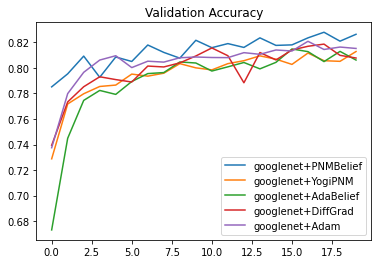

In [35]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

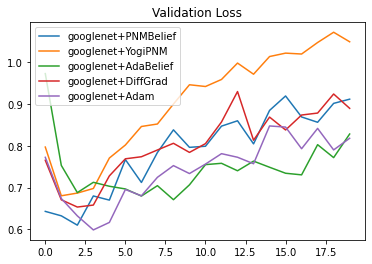

In [36]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [ ]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D